In [ ]:
import cv2

input = cv2.imread('./elephant.jpeg')
cv2.imshow('Hello World', input)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
print(input.shape)

In [ ]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('./Computer-Vision-Tutorial-master/Haarcascades/haarcascade_frontalface_default.xml')

image = cv2.imread('./Computer-Vision-Tutorial-master/image_examples/elephant.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray, 1.3, 5)
 
if faces is ():
    print("The faces is empty")

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('FaceDetection', image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('./Computer-Vision-Tutorial-master/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('./Computer-Vision-Tutorial-master/Haarcascades/haarcascade_eye.xml')

img = cv2.imread('./Computer-Vision-Tutorial-master/image_examples/Modi.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
    print("NO faces please")

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h),(127,0,243) , 2)
    cv2.imshow("Face Classifier and eye Classifier", img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (255,255,0), 2)
        cv2.imshow('img', img)
        cv2.waitKey(0)

cv2.destroyAllWindows()
    

In [ ]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('./Computer-Vision-Tutorial-master/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('./Computer-Vision-Tutorial-master/Haarcascades/haarcascade_eye.xml')

img = cv2.imread('./Computer-Vision-Tutorial-master/image_examples/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray,1.3,5)

if faces is ():
    print("There is no face in the picture.")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(123,123,123),2)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,203),2)
        cv2.imshow('img',img)
        cv2.waitKey(0)
        
cv2.destroyAllWindows()
        


# Face and eye detection from videos

In [1]:
import cv2

face_classifier = cv2.CascadeClassifier('./Computer-Vision-Tutorial-master/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('./Computer-Vision-Tutorial-master/Haarcascades/haarcascade_eye.xml')


def detect(gray, frame):
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is ():
        print("There are no faces")
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,255), 2)
        roi_color = 
        


video_capture = cv2.video_capture(0)
while True:
    _, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    

SyntaxError: invalid syntax (<ipython-input-1-b561bb61cef0>, line 14)

# Pedestrian Detection

In [ ]:
import cv2

body_classifier = cv2.CascadeClassifier('./Computer-Vision-Tutorial-master/Haarcascades/haarcascade_fullbody.xml')

cap = cv2.VideoCapture('./Computer-Vision-Tutorial-master/image_examples/walking.avi')

while cap.isOpened():
    
    ret, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)
    
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (253,3,230), 2)
        cv2.imshow('Pedestrians', frame)
        
    if cv2.waitKey(1) == 13:
        break
        

cap.release()
cv2.destroyAllWindows()
        


# Car detection

In [ ]:
import cv2
import time
import numpy as np

car_classifier = cv2.CascadeClassifier('./Computer-Vision-Tutorial-master/Haarcascades/haarcascade_car.xml')

cap = cv2.VideoCapture('./Computer-Vision-Tutorial-master/image_examples/cars.avi')

while cap.isOpened():
    time.sleep(.05)
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cars = car_classifier.detectMultiScale(gray, 1.4, 2)
    
    for (x,y,w,h) in cars:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (234,45,24), 2)
        cv2.imshow('Car', frame)
    
    if cv2.waitKey(2) == 13:
        break
    
cap.release()
cv2.destroyAllWindows()

# Car Velocity Detection


In [ ]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

# get file names of the frames
col_frames = os.listdir('frames/')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('frames/'+i)
    # append the frames to the list
    col_images.append(img)

# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "contour_frames_3/"

for i in range(len(col_images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)  

# Text Recognition


In [5]:
# text recognition
import cv2
import pytesseract
# read image
im = cv2.imread('./test.jpg')
# configurations
config = ('-l eng --oem 1 --psm 3')
# pytessercat
text = pytesseract.image_to_string(im, config=config)
# print text
#for word in text:
   # if word != ():
       # print(word)


# Ball Recognition

In [2]:
import cv2
import numpy as np
import imutils

video = './ball tracking/28.mp4'

cap = cv2.VideoCapture(video)
cnt=0

if (cap.isOpened() == False):
    print("There is an error in reading the file.")

ret, first_frame = cap.read()

while (cap.isOpened()):
    
    ret, frame = cap.read()
    
    if ret == True:
        
        roi = frame[:800,:]
        thresh=600
        end = roi.shape[1] - thresh
        roi = roi[:,thresh:end]
        
        cv2.imshow('image', roi)
        
        #press q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
        cv2.imwrite('/frames'+str(cnt)+'.png',roi)
        cnt = cnt + 1
    else:
        break
cv2.destroyAllWindows()
        

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import re

#listing down all the file names
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

#reading frames
images=[]
for i in frames:
    img = cv2.imread('frames/'+i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(25,25),0)
    images.append(img)

images=np.array(images)

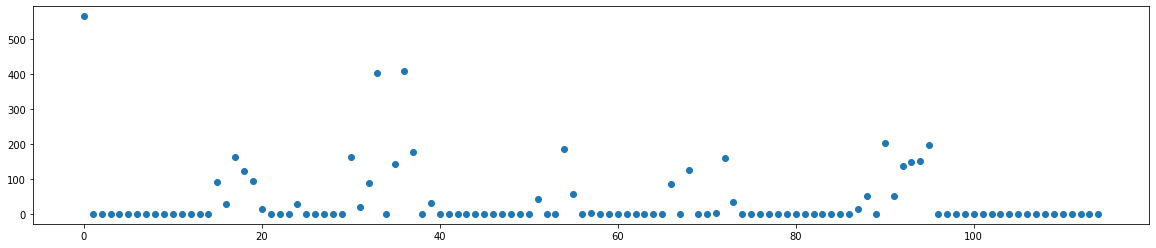

In [4]:
nonzero=[]
for i in range((len(images)-1)):
    
    mask = cv2.absdiff(images[i],images[i+1])
    _ , mask = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY)
    num = np.count_nonzero((mask.ravel()))
    nonzero.append(num)
    
    
x = np.arange(0,len(images)-1)
y = nonzero

plt.figure(figsize=(20,4))
plt.scatter(x,y)

In [1]:
threshold = 15 * 10e3
for i in range(len(images)-1):
    if(nonzero[i]>threshold): 
        scene_change_idx = i
        break
        
frames = frames[:(scene_change_idx+1)]

NameError: name 'images' is not defined